<span style="font-size:large;">
<div style="text-align: right">CSTS-UH 1078 <b>Networks</b><br/>
Student name: <span style="color:blue"><b>Sashank Silwal</b></span><br/>
Grade: <span style="color:blue"><b></b></span><br/><br/></div>

## <span style="color:red">HOMEWORK 2</span>
# <span style="color:green">Data and Network Analysis of Twitter Datasets

<span style="color:blue"><b>Below, replace "/Volumes/LaCie/WorkPlaces/Python Projects 2/2 NYUAD Networks/CourseNotebooks/Utilities/TwitterUtils/" by the position of TwitterUtils in your computer.</b></span>

In [1]:
import math, twitter, re, string, copy, itertools, pickle, datetime, pandas as pd, numpy as np, matplotlib.pyplot as plt, networkx as nx
from collections import Counter, OrderedDict
import operator
import os
os.chdir("/Users/sashanksilwal/Desktop/Freshman /Networks/Utilities/TwitterUtils/")
import tools as tool
from wordcloud import WordCloud
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

#### Loading the Dataframe

<span style="color:blue"><b>Below, as "st" set the name of your dataset and as "plname1" the name of the corresponding .pc file.</b></span>

In [2]:
st="FC Barcelona"
gname=st
# stc="FCBarcelona_df.pic" #st.replace(" ","")
plname1= "FCBarcelona_df.pic" #stc+"_df.pic" 
mt = pd.read_pickle(plname1)
mt=mt.sort_values(by='created_at')
mt.head()

,twitter_id,created_at,screen_name,hashtags_list,mentions_list,lang,text,date
9214,1168313185767702528,Mon Sep 02 00:02:24 +0000 2019,ThisIsAYeDream,NaN,[Robertonical],en,RT @Robertonical: Probably worked for FC Barce...,2019-09-02 00:02:24
9213,1168313426306895877,Mon Sep 02 00:03:21 +0000 2019,rabomio,[ChiringuitoNeymar],NaN,es,LAMENTABLE la actitud del FC -barcelona con un...,2019-09-02 00:03:21
9212,1168313854255931392,Mon Sep 02 00:05:03 +0000 2019,CaraotaDigital,[Barcelona],NaN,es,¡Esto se salió de control! Al #Barcelona le da...,2019-09-02 00:05:03
9211,1168313969003700229,Mon Sep 02 00:05:31 +0000 2019,amazingistheman,NaN,[FrenkieStats],en,RT @FrenkieStats: FC Barcelona vs Real Madrid ...,2019-09-02 00:05:31
9210,1168314334704996352,Mon Sep 02 00:06:58 +0000 2019,betigorriak1920,NaN,"[RafaelEscrig, CAOsasuna]",es,"RT @RafaelEscrig: Roberto Torres, navarro y os...",2019-09-02 00:06:58


In [3]:
lh=[]
for i in mt["hashtags_list"].tolist():
    if type(i)==list: #!=float:
        t=[]
        for ii in i:
            ii=ii.lower()
            t.append(ii)
        lh.append(t)
    else:
        lh.append([])
lh
mt["hashtags_list"]=lh
# mt #.head()
evd=mt['created_at']
evd=pd.to_datetime(evd)
mt['date']=evd
mt=mt.sort_values(by="date")
mt

,twitter_id,created_at,screen_name,hashtags_list,mentions_list,lang,text,date
17817,1167833292177063938,Sat Aug 31 16:15:28 +0000 2019,Bluechiguire,[],[InvictosSomos],es,RT @InvictosSomos: Tiene 16 años de edad y sol...,2019-08-31 16:15:28+00:00
17816,1167833293200515078,Sat Aug 31 16:15:29 +0000 2019,jrmuch_7,[],[InvictosSomos],es,RT @InvictosSomos: Tiene 16 años de edad y sol...,2019-08-31 16:15:29+00:00
17815,1167833293330497536,Sat Aug 31 16:15:29 +0000 2019,Julian_A17,[],[InvictosSomos],es,RT @InvictosSomos: Tiene 16 años de edad y sol...,2019-08-31 16:15:29+00:00
17814,1167833294236454914,Sat Aug 31 16:15:29 +0000 2019,jdordonez98,[],[InvictosSomos],es,RT @InvictosSomos: Tiene 16 años de edad y sol...,2019-08-31 16:15:29+00:00
17813,1167833301014523904,Sat Aug 31 16:15:30 +0000 2019,xbysetos,[],[InvictosSomos],es,RT @InvictosSomos: Tiene 16 años de edad y sol...,2019-08-31 16:15:30+00:00
17809,1167833304684539904,Sat Aug 31 16:15:31 +0000 2019,km10morales,[],[InvictosSomos],es,RT @InvictosSomos: Tiene 16 años de edad y sol...,2019-08-31 16:15:31+00:00
17812,1167833302008500224,Sat Aug 31 16:15:31 +0000 2019,Paula200600,[],[InvictosSomos],es,RT @InvictosSomos: Tiene 16 años de edad y sol...,2019-08-31 16:15:31+00:00
17811,1167833303447166976,Sat Aug 31 16:15:31 +0000 2019,_Riicardo10,[],[InvictosSomos],es,RT @InvictosSomos: Tiene 16 años de edad y sol...,2019-08-31 16:15:31+00:00
17810,1167833304080539648,Sat Aug 31 16:15:31 +0000 2019,GalloMuelas,[],[InvictosSomos],es,RT @InvictosSomos: Tiene 16 años de edad y sol...,2019-08-31 16:15:31+00:00
17808,1167833309201743874,Sat Aug 31 16:15:32 +0000 2019,Tomasmbosch,[],NaN,es,El tanto de la igualdad de Ansu Fati represent...,2019-08-31 16:15:32+00:00


In [4]:
mind=mt.date.min().strftime("%d-%m-%Y %H:%M:%S")
maxd=mt.date.max().strftime("%d-%m-%Y %H:%M:%S")
# print mind
# print maxd
print "The", st, "dataframe contains", len(mt), "tweets", "from", mind, "to", maxd

The FC Barcelona dataframe contains 17818 tweets from 31-08-2019 16:15:28 to 04-09-2019 14:34:02


## 1. Counting Tweets, Tweeple, Hashtags and Mentions

In [5]:
def flis(list):
    return [i for sl in list for i in sl]

In [6]:
list=[mt["hashtags_list"].tolist()[i] for i in range(len(mt))]
hashtags=set(flis(list))
print "Totally there are %i hashtags in %i tweets" %(len(hashtags),len(mt))

Totally there are 410 hashtags in 17818 tweets


In [7]:
print len(mt), "tweets"  
senders=set(mt["screen_name"].tolist())
print len(senders), "senders"
hashtags=set([i for sl in [mt["hashtags_list"].tolist()[i] for i in range(len(mt))] for i in sl])
print len(hashtags), "hashtags in tweets"
mm=[mt["mentions_list"].tolist()[i] for i in range(len(mt))]
mmm=[]
for i in mm:
    if type(i)==float:
        mmm.append([])
    else:
        mmm.append(i)
mentions=set([i for sl in mmm for i in sl])
print len(mentions), "mentions in tweets"
languages=set([mt["lang"].tolist()[i] for i in range(len(mt))])  
print len(mt), "tweets"
print len(languages), "languages in tweets"

17818 tweets
11537 senders
410 hashtags in tweets
1521 mentions in tweets
17818 tweets
29 languages in tweets


In [8]:
dd={}
dd["all_tweets"]=[len(mt),len(senders),len(hashtags),len(mentions),len(languages)] #,len(retweets)
df = pd.DataFrame.from_dict(dd, orient='index').reset_index()
df.rename(columns={'index': 'all_tweets', 0: 'tweets',1:"senders",2:"hashtags",3:"mentions",5:"languages"}, inplace=True) #4:"retweets",
df

,all_tweets,tweets,senders,hashtags,mentions,4
0,all_tweets,17818,11537,410,1521,29


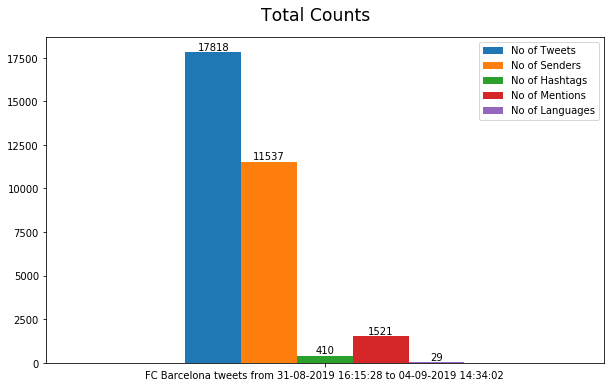

In [9]:
ax=df.plot.bar(figsize=(10,6),rot=0); 
ax.legend(["No of Tweets", "No of Senders","No of Hashtags","No of Mentions","No of Languages"]); 
labels=[st+" tweets from "+mind+" to "+maxd] 
ax.set_xticklabels(labels, rotation=0);
for p in ax.patches:
    ax.annotate("%i" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.suptitle('Total Counts', x=0.5, y=0.95, ha='center', fontsize='xx-large');

In [10]:
lmt=mt["lang"].tolist()
print "The languages are the following", len(sorted(set(lmt)))
# for i in sorted(set(lmt)):
#     print i
xc=Counter(mt["lang"].tolist())
xc=xc.most_common()
xc

The languages are the following 29


[(u'es', 10903),
 (u'en', 3830),
 (u'fi', 936),
 (u'ca', 494),
 (u'pt', 417),
 (u'de', 221),
 (u'und', 175),
 (u'nl', 163),
 (u'in', 153),
 (u'fr', 112),
 (u'pl', 95),
 (u'ja', 94),
 (u'ro', 84),
 (u'tr', 39),
 (u'ar', 21),
 (u'it', 19),
 (u'et', 11),
 (u'da', 11),
 (u'ht', 8),
 (u'tl', 6),
 (u'ml', 6),
 (u'sv', 5),
 (u'cs', 4),
 (u'lv', 4),
 (u'cy', 2),
 (u'th', 2),
 (u'vi', 1),
 (u'iw', 1),
 (u'hu', 1)]

<span style="color:blue"><b>Run the cell below as it is, if you want to exclude the top language (now, Spanish) and the undefined.</b>
    
<span style="color:blue"><b>If you want to exclude the top TWO languages, replace "x=x[1:]" by "x=xc[2:]". In this case change the plt.title to "Main Languages (other than X and XX)", where X is the first top language and XX is the second top language.</b>
    
<span style="color:blue"><b>If you want to exclude language "und", replace "keys = [i for (i,j) in x]" by "keys = [i for (i,j) in x if i != u'und']" and "performance = [j for (i,j) in x]" by "performance = [j for (i,j) in x if i != u'und']". Moreover, change the plt.title to "Main Languages (other than undefined".</b>

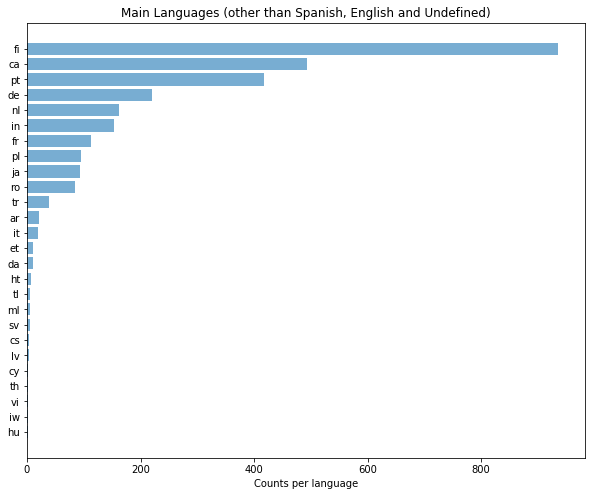

In [11]:
# x=xc[1:]
x=xc[2:]
keys = [i for (i,j) in x if i != u'und'] 
y_pos = np.arange(len(keys))
performance = [j for (i,j) in x if i != u'und'] 
plt.figure(figsize=(10,8))
ax = plt.axes()
plt.barh(y_pos, performance, align='center', alpha=0.6) 
ax.invert_yaxis()
plt.yticks(y_pos, keys)
plt.xlabel('Counts per language')
plt.title('Main Languages (other than Spanish, English and Undefined)')
plt.show()

In [12]:
mhashtags=[i for sl in [mt["hashtags_list"].tolist()[i] for i in range(len(mt))] for i in sl]
x=Counter(mhashtags)
x=x.most_common()
xx=[(i,j) for (i,j) in x if j>15] # if j>4]
xx

mhashtags=[i for sl in [mt["hashtags_list"].tolist()[i] for i in range(len(mt))] for i in sl]
x=Counter(mhashtags)
nas=[]
for xx in x:
    for a in xx:
        for c in a:
            if ord(c) < 0 or ord(c) > 127:
                if a not in nas:
                    nas.append(a)
y = []
for (x1,x2) in x.items():
    for a in x1:
        if a in nas:
            if (x1,x2) not in y: 
                y.append((x1,x2))
X=[(i,j) for (i,j) in x.items() if (i,j) not in y] # if j>4]
XX=[]
for (i,j) in X:
    for k in range(j):
        XX.append(i)
x=Counter(XX)
X=x.most_common()
xx=[(i,j) for (i,j) in X if j>0] 
xx

[(u'fj21', 769),
 (u'noticiamd', 155),
 (u'fcbarcelona', 123),
 (u'barcelona', 111),
 (u'thebest', 106),
 (u'laliga', 105),
 (u'neyback', 99),
 (u'fcblive', 57),
 (u'ansufati', 52),
 (u'neymar', 52),
 (u'deadlineday', 44),
 (u'laligasantander', 38),
 (u'deportes', 33),
 (u'lamasia', 32),
 (u'fcb', 26),
 (u'oficial', 25),
 (u'wolconeneymar', 25),
 (u'superglobe_ksa', 25),
 (u'bartomeudimision', 24),
 (u'valverdeout', 24),
 (u'urgente', 22),
 (u'rafinha', 21),
 (u'puskas', 20),
 (u'lfc', 20),
 (u'messi', 19),
 (u'futbol', 19),
 (u'celta', 19),
 (u'nextmatch', 19),
 (u'osasuna', 19),
 (u'endeportes', 18),
 (u'barca', 18),
 (u'wolcomeneymar', 18),
 (u'elvbarcaracol', 16),
 (u'estudioestadio', 16),
 (u'psg', 16),
 (u'barcabnastic', 16),
 (u'noticias', 15),
 (u'superglobe', 14),
 (u'ucl', 14),
 (u'segundabvavel', 13),
 (u'supercopaendesa', 11),
 (u'osabar', 10),
 (u'agentefifa', 10),
 (u'fifa20', 9),
 (u'heibar', 9),
 (u'dl', 9),
 (u'fichajes', 9),
 (u'soccer', 8),
 (u'ligue1', 8),
 (u'footb

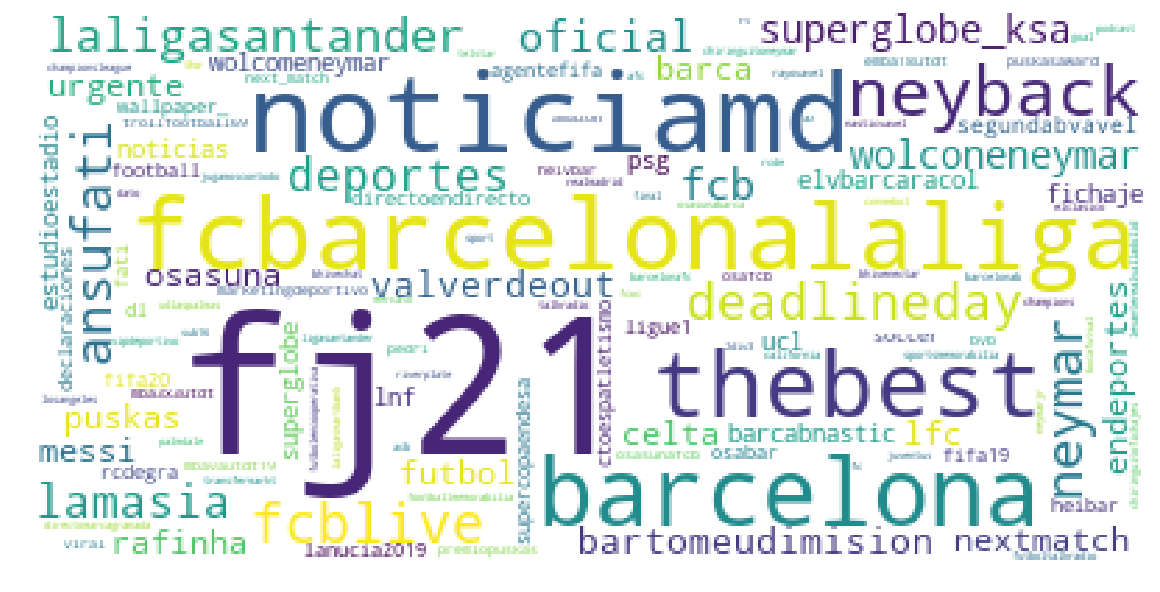

In [13]:
t=[]
for (i,j) in X:
    for k in range(j):
        t.append(i)
tt=' '.join(t)
wordcloud = WordCloud(collocations=False,background_color="white").generate(tt) #,width=200, height=200
fig = plt.figure(figsize=(20,20))
plt.imshow(wordcloud);
plt.axis("off");

<span style="color:blue"><b>In the next cell, replace "15" with the appropriate frequency so that the exhibited hashtags are less than 50. For this purpose, examine the list of (hashtags, frequencies) printed two cells above.

<span style="color:blue"><b>Furthermore, if you want to exclude the top hashtag, as in here, keep the conditional 'if i != u'climatechange' in keys and performance, otherwise remove it. You should also modify accordingly the field of the plt.title.

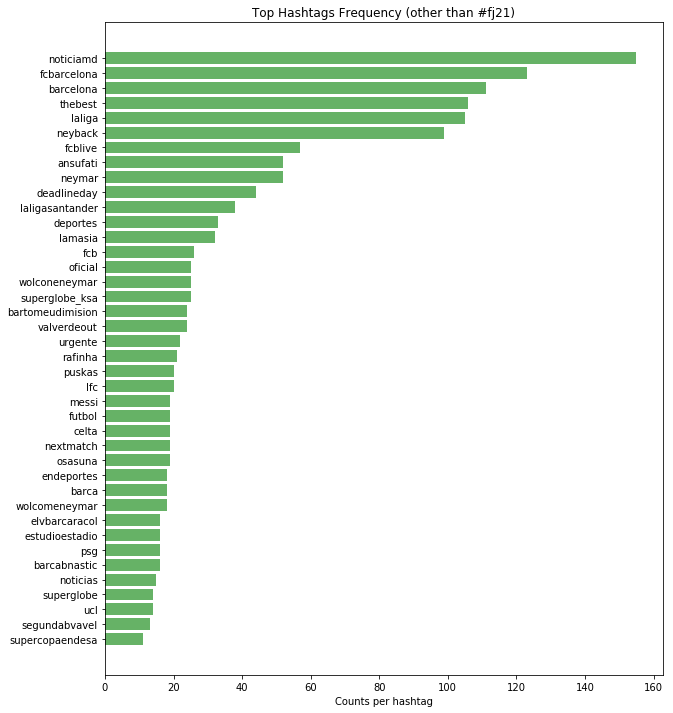

In [14]:
xx=[(i,j) for (i,j) in X if j > 10 and i!=u'fj21']
keys = [i for (i,j) in xx if i!=u'fj21'] 
y_pos = np.arange(len(keys))
performance = [j for (i,j) in xx ] #[x[k] for k in keys]
plt.figure(figsize=(10,12))
ax = plt.axes()
plt.barh(y_pos, performance, align='center', color="g",alpha=0.6) #xerr=error, 
ax.invert_yaxis()
plt.yticks(y_pos, keys)
plt.xlabel('Counts per hashtag')
plt.title('Top Hashtags Frequency (other than #fj21)')
plt.show()

## 3. Graph of Co-Occurring Hashtags

In [15]:
heds=[]
for i in range(len(mt)):
    iterable=mt.iloc[i]['hashtags_list']
    if type(iterable)!=float:
        if len(iterable)>1:
            for j in itertools.combinations(iterable, 2):
                heds.append((j[0],j[1],mt.iloc[i]['date']))
print "Number of multi-hashtag-cooccurrences:"
print "%i nonunique (%i unique)" %(len(heds),len(set(heds)))

Number of multi-hashtag-cooccurrences:
1860 nonunique (1850 unique)


<span style="color:blue"><b>Notice the command "G.remove_node(u'climatechange')", which removes the hashtag "climatechange" from the graph of co-occurring hashtags because this is the top hashtags and it would perplex the plot of this graph.

<span style="color:blue"><b>IN YOUR CASE, YOU MIGHT HAVE NOTHING TO REMOVE!!! In this case you need to comment the line "G.remove_node(u'climatechange')".

In [16]:
G=nx.MultiGraph()
for k,v in dict(Counter(heds)).items():
    G.add_edge(k[0],k[1],date=k[2])
    
nas=[]
for a in G.nodes():
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
for x in nas:
    G.remove_node(x)  

# G.remove_node(u'fj21')

print len(G.nodes()),len(G.edges())
if nx.is_connected(G)==True:
    print "This multigraph is connected"
else:
    print "This multigraph is not connected and has", nx.number_connected_components(G), "connected components"
Gl = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
Gc=G.subgraph(Gl[0])
print 'The largest connected component has:'
print "%i nodes and %i edges" %(len(Gc.nodes()), len(Gc.edges()))

247 1187
This multigraph is not connected and has 46 connected components
The largest connected component has:
151 nodes and 1064 edges


In [17]:
import pickle 
nx.write_gpickle(G,"graph2.gpickle")

In [18]:
print len(G.nodes()),len(G.edges())



247 1187


<span style="color:blue"><b>If this graph has more than 500 nodes, it would be very slow to plot it. In this case comment the whole cell below and follow the instructions in the next cell.
    
<span style="color:blue"><b>In case this graph can be plotted but the annotations/labels of nodes are overlapping (thus making the plot to be messy), then use labels[n] = "" below. Moreover, you'd rather increase the node size as well (from 0 to 100 or anything which makes sense when you see the visualization).

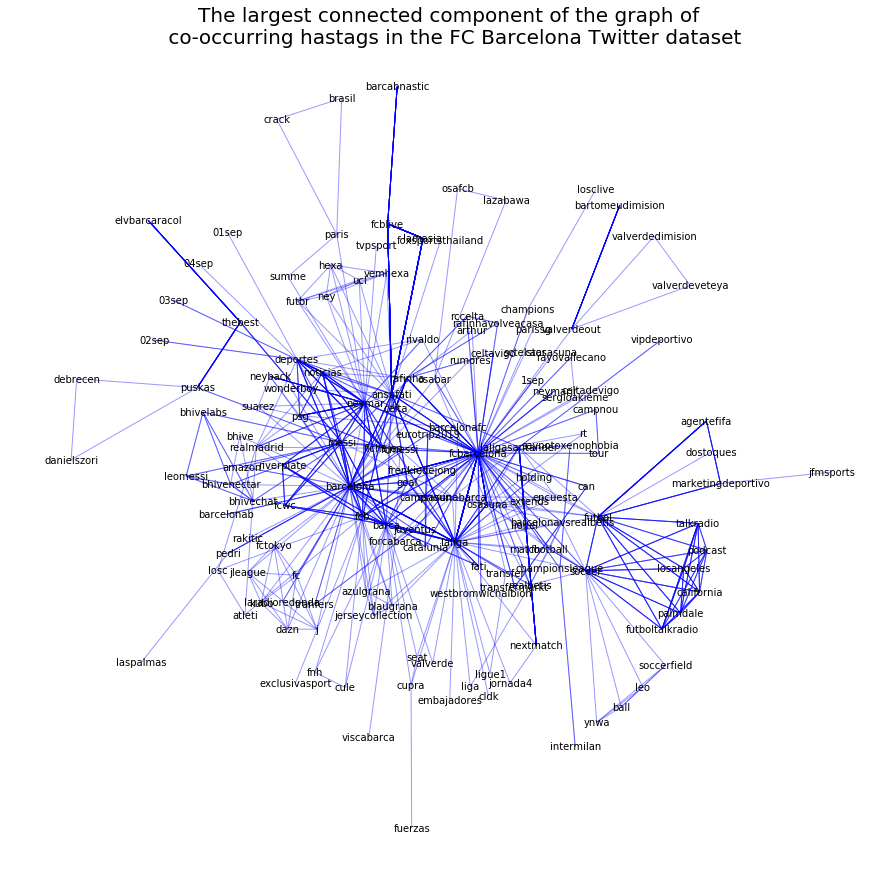

In [19]:
labels={}
for n in Gc.nodes():
    labels[n] = n #""
pos=graphviz_layout(Gc)  #nx.spring_layout(Gc,k=0.7)
plt.figure(figsize=(15,15));
nodes = nx.draw_networkx_nodes(Gc, pos,node_size=0, node_color="g", alpha=0.3)
nx.draw_networkx_edges(Gc, pos,arrowsize=20, edge_color="b", alpha=0.4)
nx.draw_networkx_labels(Gc, pos,labels=labels,font_size=10)
plt.axis('off');
sst="The largest connected component of the graph of \n co-occurring hastags in the %s Twitter dataset" %st
plt.title(sst,fontsize=20);

<span style="color:blue"><b>If the previous graph could not be plotted, plot the next biggest connected components in the next two cells:

In [20]:
Gc=G.subgraph(Gl[1])
print 'The second largest connected component has:'
print "%i nodes and %i edges" %(len(Gc.nodes()), len(Gc.edges()))

The second largest connected component has:
4 nodes and 7 edges


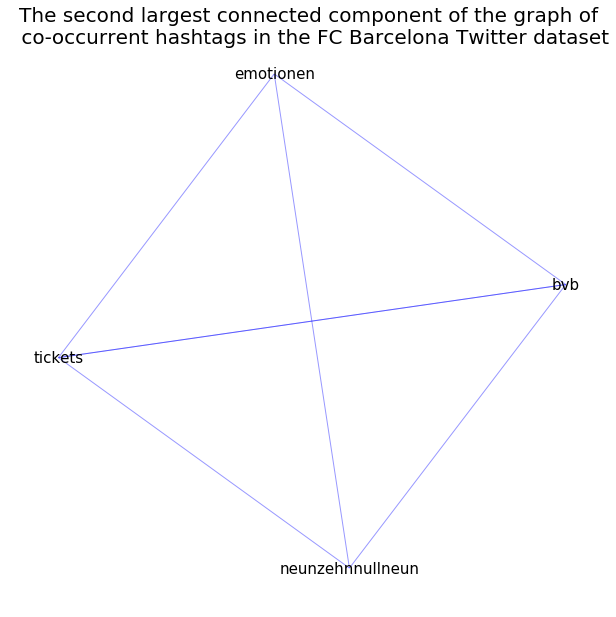

In [21]:
pos=graphviz_layout(Gc)
plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(Gc, pos,node_size=0, node_color="g", alpha=0.3)
nx.draw_networkx_edges(Gc, pos,arrowsize=20, edge_color="b", alpha=0.4)
nx.draw_networkx_labels(Gc, pos,font_size=15)
plt.axis('off');
sst="The second largest connected component of the graph of \n co-occurrent hashtags in the %s Twitter dataset" %st
plt.title(sst,fontsize=20);

## 4. Egocentric Graphs of Co-Occuring Hashtags

In [22]:
d=dict(G.degree(G.nodes()))
sd = sorted(d, key=d.__getitem__, reverse=True)
hashts=[]
for i in sd:
    if 30 < d[i] < 60:
        print "%s has degree %i" %(i,d[i])
        hashts.append(i)
print
print hashts

barca has degree 59
fcb has degree 55
messi has degree 54
futbol has degree 49
deportes has degree 48
noticias has degree 42
soccer has degree 40
osasuna has degree 36
rafinha has degree 32

[u'barca', u'fcb', u'messi', u'futbol', u'deportes', u'noticias', u'soccer', u'osasuna', u'rafinha']


<span style="color:blue"><b>From the list above, choose 3 hashtags. For instance, I've chosen u'sustainable', u'australia', and u'fish' Then I'm putting them in the cell below as egos_h = [u'sustainable',u'australia',u'fish']

In [23]:
egos_h = [u'barca', u'fcb', u'messi']
alters_h=[]
for n in egos_h:
    for nn in G.neighbors(n):
        if nn not in alters_h:
            alters_h.append(nn)
G0=G.subgraph(egos_h+alters_h)
print len(G0.nodes()), len(G0.edges())

37 397


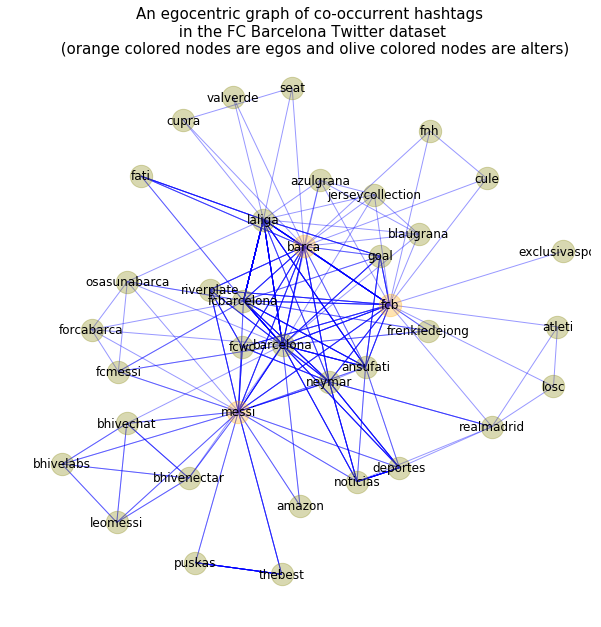

In [24]:
pos=graphviz_layout(G0)
plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(G0, pos,nodelist=egos_h,node_size=500, node_color="orange", alpha=0.3)
nodes = nx.draw_networkx_nodes(G0, pos,nodelist=[n for n in G0.nodes() if n not in egos_h],node_size=500, node_color="olive", alpha=0.3)
nx.draw_networkx_edges(G0, pos,arrowsize=20, edge_color="b", alpha=0.4)
nx.draw_networkx_labels(G0, pos,font_size=12)
plt.axis('off');
sst="An egocentric graph of co-occurrent hashtags \n in the %s Twitter dataset \n (orange colored nodes are egos and olive colored nodes are alters)" %st
plt.title(sst,fontsize=15);

## 5. Graph of Mention-ing/-ed Tweeple

In [25]:
meds=[]
for i in range(len(mt)):
    iterable=mt.iloc[i]['mentions_list']
    if type(iterable)!=float:
        for k in iterable:
            meds.append((mt.iloc[i]['screen_name'],k,mt.iloc[i]['date']))
print "Number of multi-mentions among tweeple:"
print "%i nonunique (%i unique)" %(len(meds),len(set(meds)))

Number of multi-mentions among tweeple:
16844 nonunique (16817 unique)


In [26]:
Gm=nx.MultiDiGraph()
for k,v in dict(Counter(meds)).items():
    Gm.add_edge(k[0],k[1],date=k[2])
    
nas=[]
for a in Gm.nodes():
    for c in a:
        if ord(c) < 0 or ord(c) > 127:
            if a not in nas:
                nas.append(a)
for x in nas:
    Gm.remove_node(x) 
    
print len(Gm.nodes()),len(Gm.edges())
if nx.is_weakly_connected(Gm)==True:
    print "This multigraph is weakly connected"
else:
    print "This multigraph is not weakly connected and has", nx.number_weakly_connected_components(Gm), "weakly connected components"
Gml = sorted(nx.weakly_connected_component_subgraphs(Gm), key = len, reverse=True)
# for i in range(len(Gl)):
#     if len(Gl[i].nodes())<70 and len(Gl[i].nodes())>20:
#         print i
Gmc=Gm.subgraph(Gml[0])
print 'The largest weakly connected component has:'
print "%i nodes and %i edges" %(len(Gmc.nodes()), len(Gmc.edges()))

11215 16817
This multigraph is not weakly connected and has 536 weakly connected components
The largest weakly connected component has:
9332 nodes and 15193 edges


In [27]:
import pickle 
nx.write_gpickle(Gm,"graph3.gpickle")

In [28]:
print len(Gm.nodes()),len(Gm.edges())



11215 16817


<span style="color:blue"><b>If this graph has more than 500 nodes, it would be very slow to plot it. In this case comment the whole cell below and follow the instructions in the next cell.
    
<span style="color:blue"><b>In case this graph can be plotted but the annotations/labels of nodes are overlapping (thus making the plot to be messy), then use labels[n] = "" below. Moreover, you'd rather increase the node size as well (from 0 to 100 or anything which makes sense when you see the visualization).

In [1]:
Gc=Gm.subgraph(Gml[0])
pos=graphviz_layout(Gc)  #nx.spring_layout(Gc,k=0.7)
plt.figure(figsize=(20,20));
nodes = nx.draw_networkx_nodes(Gc, pos,node_size=15, node_color="g", alpha=0.4)
nx.draw_networkx_edges(Gc, pos,arrowsize=15, edge_color="b", alpha=0.3)
# nx.draw_networkx_labels(Gc, pos,font_size=10)
plt.axis('off');
sst="The largest weakly connected component of the graph of \n mention-ing/-ed tweeple in the %s Twitter dataset" %st
plt.title(sst,fontsize=20);

NameError: name 'Gm' is not defined

In [ ]:
# Gc=Gm.subgraph(Gml[0])
# pos=graphviz_layout(Gc)  #nx.spring_layout(Gc,k=0.7)
# plt.figure(figsize=(15,15));
# nodes = nx.draw_networkx_nodes(Gc, pos,node_size=10, node_color="g", alpha=0.3)
# nx.draw_networkx_edges(Gc, pos,arrowsize=14, edge_color="b", alpha=0.3)
# # nx.draw_networkx_labels(Gc, pos,font_size=10)
# plt.axis('off');
# sst="The largest weakly connected component of the graph of \n mention-ing/-ed tweeple in the %s Twitter dataset" %st
# plt.title(sst,fontsize=20);

In [ ]:
Gmc=Gm.subgraph(Gml[1])
print 'The second largest weakly connected component has:'
print "%i nodes and %i edges" %(len(Gmc.nodes()), len(Gmc.edges()))

In [ ]:
pos=graphviz_layout(Gmc)
plt.figure(figsize=(15,15));
nodes = nx.draw_networkx_nodes(Gmc, pos,node_size=0, node_color="g", alpha=0.3)
nx.draw_networkx_edges(Gmc, pos,arrowsize=20, edge_color="r", alpha=0.4)
nx.draw_networkx_labels(Gmc, pos,font_size=10)
plt.axis('off');
sst="The second largest weakly connected component of the graph of \n mention-ing/-ed tweeple in the %s Twitter dataset" %st
plt.title(sst,fontsize=20);

## 6. Egocentric Graphs of Mention-ing/-ed Tweeple

In [ ]:
d=dict(Gm.degree(Gm.nodes()))
sd = sorted(d, key=d.__getitem__, reverse=True)
ments=[]
for i in sd:
    if 50 < d[i] < 70:
        print "%s has degree %i" %(i,d[i])
        ments.append(i)
print
print ments

<span style="color:blue"><b>From the list above, choose 1 tweeple. For instance, I've chosen u'StormSignalSA'. Then I'm putting them in the cell below as egos_m = [u'StormSignalSA']

In [ ]:
egos_m = [u'sport'] 
alters_m=[]
for n in egos_m:
    for nn in Gm.predecessors(n):
        if nn not in alters_m:
            alters_m.append(nn)
    for nn in Gm.successors(n):
        if nn not in alters_m:
            alters_m.append(nn)
Gm0=Gm.subgraph(egos_m+alters_m)
print len(Gm0.nodes()), len(Gm0.edges())

In [ ]:
pos=graphviz_layout(Gm0)
plt.figure(figsize=(15,15));
nodes = nx.draw_networkx_nodes(Gm0, pos,nodelist=egos_m,node_size=500, node_color="orange", alpha=0.8)
nodes = nx.draw_networkx_nodes(Gm0, pos,nodelist=[n for n in Gm0.nodes() if n not in egos_m],node_size=100, node_color="olive", alpha=0.3)
nx.draw_networkx_edges(Gm0, pos,arrowsize=20, edge_color="r", alpha=0.4)
nx.draw_networkx_labels(Gm0, pos,font_size=10)
plt.axis('off');
sst="An egocentric graph of mention-ing/-ed tweeple \n in the %s Twitter dataset \n (orange colored nodes are egos of tweeple and olive colored nodes are alters of tweeple)" %st
plt.title(sst,fontsize=20);